# The numpy.random package

An exploratory  investigation in to the numpy random package. The documentation can be found on scipy [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

## The overall purpose of the package

Random numbers have many uses. Marketing, psychology, clinical research and STEM disciplines, all use random numbers to some degree.  

Often, information about a specific population or groups is sought, such as people aged between 20 and 30 shopping habits.  These groups form a target population. Frequently the target population is too large, to costly to measure, if not impossible, so a sample is drawn from the target population. Sampling involves taking a subset of a given population and making generalisations about the general target population. It is vital therefore that the sample shares the same characteristics of its target population. Picking samples from a population is prone to biases. For example, if asked to pick a number at random between 1 and 10 there will be far more 3's and 7's than would be expected if the choice was truly random [ref](https://micro.magnet.fsu.edu/creatures/pages/random.html).  

One way to reduce this sampling bias is to use random sampling. Random sampling means that every item in the target population as an equal chance of being selected. In the example above, the target population would be the numbers between 1 and 10 and random sampling means that all numbers in this interval have an equal probability in being picked. The target population may follow a probability distribution.  


Sample data is used to infer something about its target population so it’s vital that sample should be representative of it as it will be used to make generalisations outside of the sample. For example, throwing a fair 6-sided dice has a population 1, 2, 3, 4, 5 and 6, each with the same chance of coming up whereas the heights of people would fall in a bell-shaped curve, most values lying within 3 standard deviations of the average height and very few people being exceptionally tall or exceptionally short.  

Computing algorithms are deterministic and cannot generate true randomness. Rather, pseudo random numbers are used (Idris, 2015). To all appearances these look random but if a key piece of information is known the whole random sequence can be predicted. This is not necessarily a bad thing. A statistical model may need the same randomness to test out other parameters. In cryptography however less, deterministic randomness would be appropriate. 

Python has an in-built random package. NumPy extends this by adding extra functionality. Both base their random generator on the Mersenne Twister algorithm [ref](https://en.wikipedia.org/ wiki/Mersenne_Twister). This is suitable to use in many areas that require random sampling [ref](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python). In order to generate a random sample, NumPy.random uses a 'seed' value in the Mersenne Twister. The random sequence propagates from this seed. For example, if the seed was 20 and the algorithm was every odd number in sequence after 20 then the generated (non random)sequence would be 21, 23, 25 etc. If no seed is specified then NumPy.random automatically selects random seed using either the computers random number generator or the current exact time on the systems clock (Vo. T.H et al., 2017).  

Numpy.random can be subdivided into 4 main routines. 

- simple random data
- permutations
- distributions
- random generator

Simple random data section consist of several functions that generate simple random data.Inputs can be size or range. Permutation functions randomly shuffle or permutes a given sequence. Distribution functions allow specific population distributions or ranges to be sampled. This may require statistical measures such as mean and standard deviation. Numpy.random can generate samples from continuous and descrite distributins (Idris, 2015). Lastly, the random generator section contains functions that allow seeds to be specified (Mehta, 2015). This is useful in cases where the exact same sequence of random data is required. Each of these sections will be explored.         


## The use of the 'Simple random data' and 'Permutations' function

- ### Simple Random Data

There are 10 simple random data functions in Numpy.random namely,rand, randn, randint, random_integers, random_sample, random, randf, sample, choice and bytes. Of these random, ranf and sample [](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)are aliases of random_sample, with similar inputs and outputs.      

In [6]:
#Import packages numpy and matplotlib.pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
# display pyplot in jupyter notebook
%matplotlib inline

Python has the built in random function for generating simple random data.

In [11]:
r1 = random.random()
print(r1)
r2 = random.uniform(0,1)
print(r2)


0.38401311618005385
0.22826532265078592


numpy.random extends this, adding extra functions and methods. 


|Simple Random Data| Input                       | Output                                                           |
| -----------------|:------------------------    | :--------------------------------------------------------------- |
| rand             | d0, d1, …, dn               | Random values in a given shape                                   |               
| randn            | d0, d1, …, dn               | sample (or samples) from the “standard normal” distribution      |              
| randint          | low`[, high, size, dtype]`  | Return random integers from low (inclusive) to high (exclusive)  |            
| random_integers  | low`[, high, size])` 	     | Random integers of type np.int between low and high, inclusive.  |
| random_sample    | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| random           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| ranf             | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| sample           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| choice           | `a[, size, replace, p]`     | Generates a random sample from a given 1-D array                 |                     
| bytes            | length                      | Random bytes                                                     |      




### rand
rand is a convenience or helper function. It creates random values in a given shape [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand). Inputs are non negative integers, although 0 returns an empty array.  If no input is given a single number is outputed. Output arrays come from the uniform distribution (i.e. each number has the same probability of being selected) between 0 inclusive and 1 exclusive `[0, 1)` 



In [21]:
# no input - output is a random number in the interval [0,1)
np.random.rand()


0.02516691658623882

In [15]:
# input is size 1, output is a random number in an array with 1 element from the interval [0, 1) 
np.random.rand(1)

array([ 0.26761587])

In [17]:
# input is size 5, output is 1 array containing 5 random numbers from the interval [0,1)
np.random.rand(5)

array([ 0.32683389,  0.23204846,  0.16742533,  0.29395208,  0.02706908])

In [18]:
# input has 3 size dimentions of 2, 3 and 4, output is 2 3x4 matrices filled with random numbers from the interval [0,1)
np.random.rand(2, 3, 4)

array([[[ 0.66751347,  0.42352047,  0.9667928 ,  0.54494117],
        [ 0.06507755,  0.70990748,  0.20888228,  0.45933747],
        [ 0.28417337,  0.5954722 ,  0.52861406,  0.17795155]],

       [[ 0.34371201,  0.70808516,  0.17477093,  0.24886912],
        [ 0.01534301,  0.8920325 ,  0.18215863,  0.15881483],
        [ 0.59904989,  0.70657067,  0.30755299,  0.2619105 ]]])

In [19]:
# input as 4 size dimentions of 2, 3, 4 and 5, output is 2 groups of 3 4x5 matrices filled with random numbers from the interval [0,1)
np.random.rand(2,3,4,5)

array([[[[ 0.07270913,  0.06699298,  0.53895026,  0.5455363 ,  0.38853007],
         [ 0.62737834,  0.78595129,  0.1295098 ,  0.79751752,  0.85165142],
         [ 0.41878141,  0.71338515,  0.68014486,  0.39599294,  0.328136  ],
         [ 0.86763777,  0.20116401,  0.53038163,  0.42297664,  0.98238063]],

        [[ 0.89452065,  0.89056279,  0.45675461,  0.89544004,  0.99804133],
         [ 0.34945696,  0.79307947,  0.1656819 ,  0.91494846,  0.16392899],
         [ 0.94745257,  0.40554618,  0.32850145,  0.05065089,  0.34341449],
         [ 0.03741776,  0.45731706,  0.97130733,  0.81466847,  0.41439476]],

        [[ 0.51051107,  0.0740565 ,  0.50578543,  0.84553077,  0.47579829],
         [ 0.73586769,  0.01677197,  0.14430809,  0.50249152,  0.71372022],
         [ 0.58049026,  0.62072226,  0.88299951,  0.74836887,  0.76954104],
         [ 0.36689787,  0.10713825,  0.41349361,  0.48172217,  0.91459587]]],


       [[[ 0.80588132,  0.72175566,  0.56552529,  0.54428526,  0.87143282],
    

### Randn

Randn is similar to rand but takes its random numbers from the standard normal distrubution with mean 0 and standard deviation 1 N(0,1). It is similar to the standard_normal distrubution in NumPy.random however standard_normal can have tuples as arguments. Randn's arguements must be positive integers or integer like (such as int(1.02)). Like rand, it is a convenience function  it fills  is  

In [ ]:


numpy.random.randn(d0, d1, ..., dn)

    Return a sample (or samples) from the “standard normal” distribution.

    If positive, int_like or int-convertible arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1 (if any of the d_i are floats, they are first converted to integers by truncation). A single float randomly sampled from the distribution is returned if no argument is provided.

    This is a convenience function. If you want an interface that takes a tuple as the first argument, use numpy.random.standard_normal instead.
    Parameters:	

    d0, d1, …, dn : int, optional

        The dimensions of the returned array, should be all positive. If no argument is given a single Python float is returned.

    Returns:	

    Z : ndarray or float

        A (d0, d1, ..., dn)-shaped array of floating-point samples from the standard normal distribution, or a single such float if no parameters were supplied.

    See also

    standard_normal
        Similar, but takes a tuple as its argument.

    Notes

    For random samples from N(\mu, \sigma^2), use:

    sigma * np.random.randn(...) + mu

    Examples
    >>>

    >>> np.random.randn()
    2.1923875335537315 #random

    Two-by-four array of samples from N(3, 6.25):
    >>>

    >>> 2.5 * np.random.randn(2, 4) + 3
    array([[-4.49401501,  4.00950034, -1.81814867,  7.29718677],  #random
           [ 0.39924804,  4.68456316,  4.99394529,  4.84057254]]) #random


    
    
    
    




The function rand takes non negative integers as inputs and outputs an the specified array with random samples from a uniform distriubtion over the interval 0 inclusive to 1 exclusive. It outputs random values in the specified shape. Shape refers to the number of arrays, rows and columns required e.g. (10,2,5) has the shape 10 arrays consisting of 2 arrays that each have 5 randomly numbers generated from the uniform distuibution between 0 inclusive and 1 exclusive. 



Randn is performs a similar function but using the simple normal distrubution. 


---

numpy.random.rand¶

numpy.random.rand(d0, d1, ..., dn)

    Random values in a given shape.

    Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
    Parameters:	

    d0, d1, …, dn : int, optional

        The dimensions of the returned array, should all be positive. If no argument is given a single Python float is returned.

    Returns:	

    out : ndarray, shape (d0, d1, ..., dn)

        Random values.

    See also

    random

    Notes

    This is a convenience function. If you want an interface that takes a shape-tuple as the first argument, refer to np.random.random_sample .

    Examples
    >>>

    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]) #random

-----






In [7]:
np.random.rand(10, 2, 5)


array([[[ 0.66996774,  0.24936803,  0.24150316,  0.06735805,  0.71131993],
        [ 0.69541276,  0.95616452,  0.2148337 ,  0.87488999,  0.18768245]],

       [[ 0.28544866,  0.13429136,  0.36283107,  0.75682961,  0.78514224],
        [ 0.32433395,  0.27372394,  0.43398206,  0.53484344,  0.38727307]],

       [[ 0.35962948,  0.15528332,  0.32112517,  0.3895027 ,  0.31160967],
        [ 0.07634209,  0.33027904,  0.68475116,  0.60375484,  0.28698228]],

       [[ 0.93343791,  0.57585333,  0.59993793,  0.02719036,  0.27523269],
        [ 0.24520071,  0.51316491,  0.73435322,  0.69428694,  0.50017716]],

       [[ 0.12628396,  0.75382506,  0.35225248,  0.04793324,  0.14092965],
        [ 0.28069414,  0.68263703,  0.20910285,  0.00761019,  0.08336117]],

       [[ 0.25627144,  0.70987744,  0.30600807,  0.57360293,  0.63075704],
        [ 0.75141051,  0.41727109,  0.0041618 ,  0.44090914,  0.10092763]],

       [[ 0.55334425,  0.39880205,  0.72580612,  0.40255973,  0.41119235],
        [ 0.8

There are several random functions here 
rand(d0, d1, …, dn) 	Random values in a given shape.
This was explained in the video

randn(d0, d1, …, dn) 	Return a sample (or samples) from the “standard normal” distribution.
This looks similar but from a normal distribution not a simple one

randint(low[, high, size, dtype]) 	Return random integers from low (inclusive) to high (exclusive).
random_integers(low[, high, size]) 	Random integers of type np.int between low and high, inclusive.
random_sample([size]) 	Return random floats in the half-open interval [0.0, 1.0).
random([size]) 	Return random floats in the half-open interval [0.0, 1.0).
ranf([size]) 	Return random floats in the half-open interval [0.0, 1.0).
sample([size]) 	Return random floats in the half-open interval [0.0, 1.0).

These all look to be the same thing - there must be a difference or else why the duplication?  

choice(a[, size, replace, p]) 	Generates a random sample from a given 1-D array
bytes(length) 	Return random bytes. 

Go through them one by one


- #### rand

[ 0.69115969]


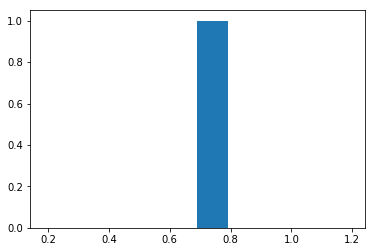

In [2]:
x = np.random.rand(1)
print(x)
plt.hist(x)
plt.show()

seems to generate one point at 0.5

[ 0.14511865  0.11065046  0.90199865  0.92807095  0.38796063  0.42057766
  0.58204496  0.06357059  0.17876515  0.74560266]


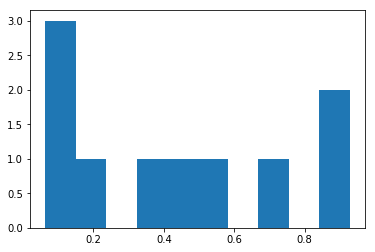

In [3]:
x = np.random.rand(int(10.0))# cant take negative values or floats but can take converted floats
print(x)
plt.hist(x)
plt.show()

seems to generate 10 datapoints 3 between 0.1 and 0.2, 2 between 03 and 0.4 and 0.7 and 0.8 and 1 in each of 0.5 and 0.6 intervals.

[[ 0.91639022  0.35963822  0.45192784  0.91366827  0.20828559  0.36783371
   0.46651457  0.46001876  0.906052    0.61754852]
 [ 0.058852    0.02072701  0.30595702  0.29803796  0.39766826  0.20028544
   0.55479122  0.58791045  0.77672013  0.50487343]
 [ 0.3845816   0.35777376  0.02214325  0.47227734  0.11107362  0.58313899
   0.18323646  0.07656057  0.00722292  0.09095785]
 [ 0.257447    0.54247969  0.71486881  0.96059043  0.03709215  0.36268506
   0.99468114  0.48901799  0.00850288  0.75993967]
 [ 0.41808325  0.22698157  0.98701015  0.47851518  0.71753395  0.46270316
   0.86514652  0.03297187  0.50308076  0.22729603]]


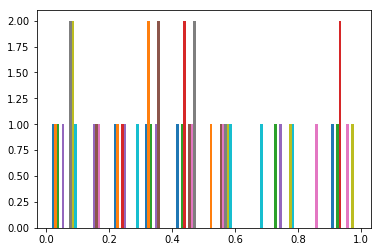

In [4]:
x = np.random.rand(5,10)
print(x)
plt.hist(x)
plt.show()

generates 5 rows of 10 items.

In [5]:
x = np.random.rand(2, 3, 4)
print(x) # cant seem to plot histograms in higher dims


[[[ 0.59441873  0.49018558  0.59137228  0.96077462]
  [ 0.17500889  0.55109323  0.14043151  0.56220047]
  [ 0.40988496  0.04191598  0.32099433  0.53829152]]

 [[ 0.27563377  0.16845319  0.38275605  0.55977525]
  [ 0.94498348  0.24054493  0.53364478  0.78186469]
  [ 0.5554342   0.95483323  0.01477836  0.07248312]]]


In [6]:
x = np.random.rand(3, 2, 4)
print(x)

[[[ 0.34353635  0.53158576  0.65401563  0.90515293]
  [ 0.68036814  0.31640458  0.64352076  0.51580942]]

 [[ 0.83898498  0.08528721  0.51017854  0.89497171]
  [ 0.42011935  0.05278502  0.26552589  0.48456869]]

 [[ 0.76968047  0.00634897  0.17181564  0.67762374]
  [ 0.43428714  0.11991353  0.00390469  0.53881237]]]


In [7]:
x = np.random.rand()
print(x)

0.782181097950914


different from np.random.rand(1) as its a single number not an array with a single entry. 

the definition in scipy docs is (my notes in brackets)

Random values in a given shape. (given shape here is the dimensions passed to the function, no enteries gives a single random number from a uniform distribution, 1 entery give an array with a single entry - how does this differ from the first? whats the difference between a single number and array with a single number? 

Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
Parameters:

(0 is included but 1 is not)

d0, d1, …, dn : int, optional

    The dimensions of the returned array, should all be positive. If no argument is given a single Python float is returned.

Returns:	

out : ndarray, shape (d0, d1, ..., dn)

    Random values.


- #### randn

definition from scipy is

Return a sample (or samples) from the “standard normal” distribution. (unlike rand which is uniform)

If positive, int_like or int-convertible arguments are provided (what does this mean? can it take negative arguments?), randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1 (if any of the d_i are floats, they are first converted to integers by truncation). A single float randomly sampled from the distribution is returned if no argument is provided. (basic distribution is standard normal, converts to integers if floats given)

This is a convenience function (what does this mean from [wiki(This is a convenience function)](https://en.wikipedia.org/wiki/Convenience_function), . If you want an interface that takes a tuple as the first argument, use numpy.random.standard_normal instead.
Parameters:	

d0, d1, …, dn : int, optional (same arguments as rand)

    The dimensions of the returned array, should be all positive. If no argument is given a single Python float is returned.

Returns:	

Z : ndarray or float

    A (d0, d1, ..., dn)-shaped array of floating-point samples from the standard normal distribution, or a single such float if no parameters were supplied.


[[-0.39427392 -1.05305618  2.29260176 -0.26031503  0.96437578]
 [ 0.72541139 -0.64751885  1.50355856 -1.65318098 -1.13942652]]


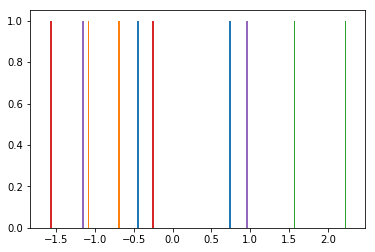

In [8]:
x = np.random.randn(int(2.0),int(5.0)) # 1 gives on numbe 5 gives 5 when more bins added, try 2 arguments
print(x)
plt.hist(x, bins =30)
plt.show()

2 arguments 1,2 1<2 gives 1 array of 2 random numbers on a standard normal distribution
5>2 still works 5 arrays with 2 numbers in each
2>5 2 arrays with 5 numbers in each
what about negatives, floats and the like?
negatives gives error negative dimension not allowed for any d(i)

np.random.randn(2.01,5.5) wont work with a float what does int like meean maybe 2.0 rather than 2.02 still wont work but will if int is used to convert it int(2.0),int(5.0)




[-1.70226286 -0.12062132  0.35021373 -0.37063057  0.29489051]


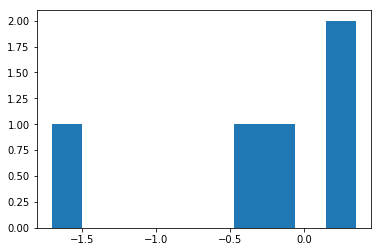

In [9]:
x = np.random.randn(5)
print(x)
plt.hist(x)
plt.show()

[-1.74431261 -1.28610641  0.19698022 -1.77567311  1.32188534 -1.09696741
 -1.05749347  0.41269593  0.24198686 -0.14408271  1.9029696  -1.57294561
 -0.59641228 -0.62239592  0.13221252  1.00790649  0.65833265 -0.66609542
 -0.9549376  -0.2524508   0.75373514 -0.80147516  1.88760235 -0.34300841
  0.09180237  2.68554306 -0.31594667 -0.35666642  0.1952289   0.90918552
  1.34914753  0.89399645  0.79975559 -0.19420486  1.59774167  0.81564064
  1.12586767  1.36561455 -1.82700232 -0.31319782 -0.03460637  0.6901763
 -1.12577855 -0.14789959 -0.89562053  0.02007846 -0.21552245  0.50390489
  0.29244582 -0.40105672 -1.56729036  0.85837077 -0.62775214  1.36267133
  0.00963972 -0.13355402  2.23453703 -0.55569608 -0.4324574   1.16152672
 -1.23279874  1.5042424   0.88661504 -1.24255766 -0.7645148   0.74486575
  1.14471723  1.99747787 -0.46902129 -0.01060004 -1.0441838   0.12446021
 -0.89028176  0.19861808 -0.20036382 -1.44291801  0.70965596  1.85275198
 -0.09035606  0.06723611 -1.50263433  0.05551765  0.

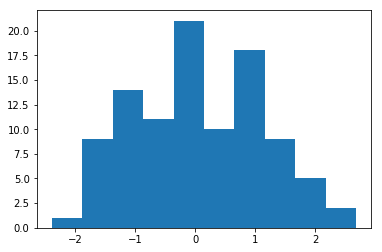

In [10]:
x = np.random.randn(100)
print(x)
plt.hist(x)
plt.show()

[[-0.02113528 -0.3692757 ]
 [ 0.63233567  0.21520105]
 [ 0.44845517  1.31964089]
 ..., 
 [ 0.89123449  0.41242763]
 [ 0.16953007 -0.59925311]
 [ 0.51047117  0.35376228]]


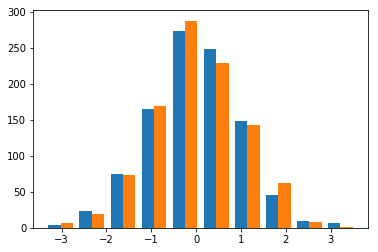

In [11]:
x = np.random.randn(1000, 2)
print(x)
plt.hist(x)
plt.show()

In [12]:
x = np.random.randn(1000, 2, 3)
print(x)


[[[-0.24705698  1.85623485 -0.44449695]
  [-2.01841721  0.37799139  0.78963835]]

 [[ 1.15020999 -0.55633555  0.52060157]
  [ 0.63576143  0.24926295  0.02338084]]

 [[-1.13299306  0.86609908  0.21127163]
  [-0.7106859   2.49975515  0.15813816]]

 ..., 
 [[-0.43222421  1.2719235   0.76199614]
  [ 0.73320835  0.814594    0.50263704]]

 [[-0.50406039  0.12649689  0.24800181]
  [-0.52896144 -1.02882731  0.79973109]]

 [[ 1.44006783  1.54437695  0.71072229]
  [-0.54138428  0.99151019 -0.72264738]]]


Rand and Randn seem to be the same idea of generating random numbers but rand follows a uniform distribution i.e. every option as likely to turn up as every other one, whereas randn follows the normal distribution ie the majority will be within 3ds's of the central value. 

- ### randint

from scipy docs 

 numpy.random.randint(low, high=None, size=None, dtype='l')

    Return random integers from low (inclusive) to high (exclusive). (sets the band for random numbers to appear, previously in rand numbers appeared within [0,1) so this expands on this, d type? l must mean long decimal type no it means long integer so the input is still integers)

    Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low). (this seems okay 0-low if no high given and low to high if high given what about size? int or tuple of int? what does that mean)
    Parameters:	

    low : int

        Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is one above the highest such integer).
    high : int, optional

        If provided, one above the largest (signed) integer to be drawn from the distribution (see above for behavior if high=None).
    size : int or tuple of ints, optional

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
    dtype : dtype, optional

        Desired dtype of the result. All dtypes are determined by their name, i.e., ‘int64’, ‘int’, etc, so byteorder is not available and a specific precision may have different C types depending on the platform. The default value is ‘np.int’.

        New in version 1.11.0.

    Returns:	

    out : int or ndarray of ints

        size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.


[[  7 -10  -6   1   4]
 [ -9   7  -4  -8  -4]]


([array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.])],
 array([-10. ,  -8.3,  -6.6,  -4.9,  -3.2,  -1.5,   0.2,   1.9,   3.6,
          5.3,   7. ]),
 <a list of 5 Lists of Patches objects>)

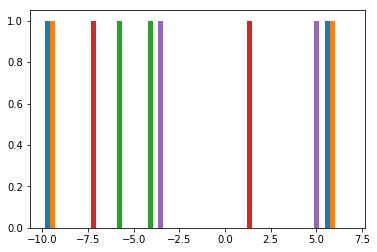

In [13]:
x = np.random.randint(-10,10, size=(2,5))
print(x)
plt.hist(x)

needs an arguemtn the empty one gives errors
1 gives 0 ie number from \[0,1), [1,1),  also gives and error 1,5 gives 1 random number between 1 inclusive and 5 exclusive, size gives a list of numbers depending on the size eg no size gives 1, size 5 gives 5 numbers in an array dtype specifies the type of the output the number is given in
can take negative numbers and floats as inputs but low has to be less than high. Size can be a tuple (5,2) generates 5 arrays with 2 elements and (2,5) generates 2 arrays between low and high with 5 elements


- ### random_integers

from scipy numpy.random.random_integers

numpy.random.random_integers(low, high=None, size=None)

    Random integers of type np.int between low and high, inclusive. (this is the main difference between random_integers fucntion and randint function)

    Return random integers of type np.int from the “discrete uniform” distribution in the closed interval [low, high]. If high is None (the default), then results are from [1, low]. The np.int type translates to the C long type used by Python 2 for “short” integers and its precision is platform dependent. (this function appears to be for python 2 it has the same default dtype as randint but randint allows different dtypes to be outputted)

    This function has been deprecated. Use randint instead. (deprecated)

    Deprecated since version 1.11.0.
    Parameters:	

    low : int

        Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is the highest such integer).
    high : int, optional

        If provided, the largest (signed) integer to be drawn from the distribution (see above for behavior if high=None).
    size : int or tuple of ints, optional (same as for randint)

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : int or ndarray of ints

        size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.


In [14]:
np.random.random_integers(0,1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  """Entry point for launching an IPython kernel.


0

this function is deprecated but still works gives  5 gives a single number between 0 inclusive and 5 inclusive so same as before low to high, low < high or error; can take negatives and floats, only differences appears to be inspecifying the dtype of the output adn taht the high bound is inclusive unlike randint The scipy notes has 

To sample from N evenly spaced floating-point numbers between a and b, use:

a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1.)

`

[ 13.33333333  15.55555556  16.66666667  20.          14.44444444
  14.44444444  20.          11.11111111  18.88888889  20.          13.33333333
  15.55555556  13.33333333  16.66666667  16.66666667  14.44444444
  15.55555556  18.88888889  15.55555556  11.11111111  11.11111111  10.          20.
  14.44444444  16.66666667  15.55555556  18.88888889  20.          18.88888889
  13.33333333  16.66666667  10.          20.          11.11111111  10.          10.
  11.11111111  14.44444444  20.          20.          14.44444444
  16.66666667  12.22222222  10.          18.88888889  10.          10.
  15.55555556  15.55555556  11.11111111]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


(array([ 7.,  6.,  1.,  4.,  6.,  7.,  6.,  0.,  5.,  8.]),
 array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 10 Patch objects>)

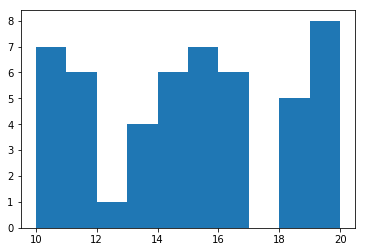

In [15]:
a,b,N=10,20,10

x=a + (b - a) * (np.random.random_integers(N, size=50) - 1) / (N - 1)
print(x)
plt.hist(x) # 50 random numbers from 10 evenly spaced spots between 10 and 20 inclusive

- ### numpy.random.random_sample

 from scipy 
 numpy.random.random_sample(size=None)

    Return random floats in the half-open interval [0.0, 1.0). (only size is a variable the interval is 0 inclusive and 1 exclusive, only size as argument)

    Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random_sample by (b-a) and add a: (distribution is continuous as opposed to discrete in the prevous functions)

    (b - a) * random_sample() + a

    Parameters:	

    size : int or tuple of ints, optional (only size is the parameter but size can be int or int tuples if size not given then one array with n enteries given where n is the parameter)

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : float or ndarray of floats

        Array of random floats of shape size (unless size=None, in which case a single float is returned).


In [16]:
x=np.random.random_sample(4)
print(x)
np.random.random_sample((3, 2))# note the size can be 2  or mor arguments but not the variable in the function


[ 0.63669927  0.55914413  0.44436002  0.41242601]


array([[ 0.28861102,  0.88673686],
       [ 0.80178909,  0.48107459],
       [ 0.45123947,  0.28114829]])

returns a single random float between \[0,1)floats when no input given
returns a 1xn single random float in an array when n argumetn given
input still needs to be an integer. can take only one argument the size. So its a continous distribution

- ### numpy.random.random

 numpy.random.random(size=None)

    Return random floats in the half-open interval [0.0, 1.0). (same as above with random_sample)

    Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random_sample by (b-a) and add a:

    (b - a) * random_sample() + a

    Parameters:	

    size : int or tuple of ints, optional (same as above with random_sample)

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : float or ndarray of floats

        Array of random floats of shape size (unless size=None, in which case a single float is returned).
        
        (I cant see any difference between random_sample and random, they both are from the same half interval and continous and take size as an input and give a float as an output )


In [17]:
np.random.random_sample((3,2))


array([[ 0.41349194,  0.66819101],
       [ 0.37681778,  0.07681249],
       [ 0.57833575,  0.03314228]])

it appears that 

    random_sample([size]) Return random floats in the half-open interval [0.0, 1.0).

    random([size]) Return random floats in the half-open interval [0.0, 1.0).

    ranf([size]) Return random floats in the half-open interval [0.0, 1.0).

    sample([size]) Return random floats in the half-open interval [0.0, 1.0).
are all just aliases to random_sample as noted [here](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)




- ### numpy.random.ranf

 numpy.random.ranf(size=None)

    Return random floats in the half-open interval [0.0, 1.0). (Same)

    Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random_sample by (b-a) and add a:

    (b - a) * random_sample() + a

    Parameters:	

    size : int or tuple of ints, optional (Same)

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : float or ndarray of floats (Same)

        Array of random floats of shape size (unless size=None, in which case a single float is returned).


-- ### numpy.random.sample

 numpy.random.sample(size=None)

    Return random floats in the half-open interval [0.0, 1.0). (same)

    Results are from the “continuous uniform” distribution over the stated interval. To sample Unif[a, b), b > a multiply the output of random_sample by (b-a) and add a:

    (b - a) * random_sample() + a

    Parameters:	

    size : int or tuple of ints, optional (same)

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

    Returns:	

    out : float or ndarray of floats (same)

        Array of random floats of shape size (unless size=None, in which case a single float is returned).


- ### numpy.random.choice


 numpy.random.choice(a, size=None, replace=True, p=None)¶

    Generates a random sample from a given 1-D array

        New in version 1.7.0. 

    Parameters:	

    a : 1-D array-like or int

        If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional

        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
    replace : boolean, optional

        Whether the sample is with or without replacement
    p : 1-D array-like, optional

        The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

    Returns:	

    samples : single item or ndarray

        The generated random samples

    Raises:	

    ValueError

        If a is an int and less than zero, if a or p are not 1-dimensional, if a is an array-like of size 0, if p is not a vector of probabilities, if a and p have different lengths, or if replace=False and the sample size is greater than the population size


In [18]:
np.random.choice(5, 3) # generate 3 numbers between [0 5)?
np.random.choice(2, 50) # (a,b) generates b random numbers between [0,a)
np.random.choice(2, 12, p=[0.05, 0.95])# ps have to sum to 1, ps have to be the same size as the first number a
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
np.random.choice(aa_milne_arr, 5, p=[0.9, 0.0, 0.0, 0.1])
np.random.choice(3,100,p=[0.4,0.4,0.2])

array([2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 1, 2, 0], dtype=int64)

- ### numpy.random.bytes

 from scipy
    numpy.random.bytes(length) (input is length of bytes?)

    Return random bytes.
    Parameters:	

    length : int

        Number of random bytes.

    Returns:	

    out : str

        String of length length.


In [19]:
np.random.bytes(10) # outputs 10 random bytes a ll start with b' or b" all end with ' cause its a string doh!!


b'\x1b\xd0\x9e7\xc7\x18\x97\xb3\x9d\xf1'

[why the b at the front](https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)

- ### Permutations    

## The use and purpose of at least five 'distributions' functions

- ### Uniform

- ### Normal

- ### Binomial

- ### Possion

 - ### Power

##  The use of seeds in generating pseudorandom numbers


# Reference

Idris, I. (2015). NumPy: Beginner's Guide - Third Edition. 3rd ed. BIRMINGHAM - MUMBAI: Packt Publishing. 

McKinney, W. (2018). Python for data analysis. Beijing [i 4 pozostałe]: O'Reilly.

Docs.scipy.org. (2018). Random sampling (numpy.random) — NumPy v1.15 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html [Accessed 20 Oct. 2018].

Vo. T.H, P., Czygan, M., Kumar, A. and Raman, K. (2017). Python. Birmingham: Packt Publishing.

McLeod, S. (2018). Sampling Methods | Simply Psychology. [online] Simplypsychology.org. Available at: https://www.simplypsychology.org/sampling.html [Accessed 20 Oct. 2018].

En.wikipedia.org. (2018). Simple random sample. [online] Available at: https://en.wikipedia.org/wiki/Simple_random_sample [Accessed 20 Oct. 2018].

Mehta, H. (2015). Mastering Python scientific computing. 1st ed. Birmingham: Packt Publishing.